# Correlate topic mixtures from MixEHR with ventilation duration
Here different categories (e.g. physician, nurse) are treated as different data types.

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
%matplotlib inline

## Read data

In [192]:
mixtures = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_d2_phy_nurse_48/infer/train_topics.csv', header=None)
duration = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_d2_phy_nurse_48/train_vent.txt', header=None, sep=' ')
duration = duration[1].astype(np.float64)

In [193]:
print(duration.shape)
print(mixtures.shape)

(1233,)
(1233, 50)


In [194]:
mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.129941,0.274401,1.358556,0.273798,1.087154,0.314356,3.025618,15.420935,0.312452,3.912363,...,15.601606,2.307766,3.143841,3.670899,1.517998,0.384671,0.305688,42.488261,100.856903,6.817440
1,0.421864,0.138054,0.350621,2.464375,1.429933,0.127961,2.145749,1.418313,0.435347,120.093321,...,97.431829,2.051048,1.376759,0.541885,0.094458,0.082534,0.233221,0.537403,0.395342,0.825123
2,1.830491,0.966141,8.003215,0.782954,2.179948,70.451731,0.077392,10.355591,16.299213,1.863593,...,0.765069,0.312041,0.193189,0.740490,1.338808,0.275185,73.429167,0.306938,0.201400,0.339517
3,0.478385,0.555676,7.008054,4.228558,4.361622,6.968557,2.106957,15.068294,11.752822,17.071710,...,0.336485,56.802797,1.428947,3.423297,54.312036,1.183303,0.389929,3.050380,0.872747,0.537862
4,0.110099,1.999215,0.930120,47.089720,3.610418,1.668587,0.186918,10.501396,40.762105,32.671139,...,1.041798,0.302472,4.416525,46.959126,146.789238,0.133521,0.368301,0.227217,2.832592,32.908140


In [195]:
duration.head()

0     46.250000
1    155.716667
2     21.850000
3    299.683333
4    230.000000
Name: 1, dtype: float64

## Normalize

In [196]:
normed_mixtures = pd.DataFrame(normalize(mixtures.iloc[:,2:51], norm='l1', axis=1))

In [197]:
mixtures.sum(axis=1)

0       1267.0
1        868.0
2       1560.0
3        764.0
4        638.0
         ...  
1228     906.0
1229     520.0
1230     519.0
1231     606.0
1232    2204.0
Length: 1233, dtype: float64

## See if mixture's rows sum up to 1

In [198]:
normed_mixtures.sum(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1228    1.0
1229    1.0
1230    1.0
1231    1.0
1232    1.0
Length: 1233, dtype: float64

## Heatmap

In [199]:
normed_mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.001073,0.000216,0.000858,0.000248,0.002389,0.012175,0.000247,0.003089,0.033095,0.001959,...,0.012318,0.001822,0.002482,0.002898,0.001198,0.000304,0.000241,0.033545,0.079628,0.005382
1,0.000404,0.002841,0.001648,0.000148,0.002474,0.001635,0.000502,0.138446,0.001575,0.008317,...,0.112321,0.002364,0.001587,0.000625,0.000109,0.000095,0.000269,0.000620,0.000456,0.000951
2,0.005139,0.000503,0.001400,0.045242,0.000050,0.006650,0.010467,0.001197,0.000286,0.001100,...,0.000491,0.000200,0.000124,0.000476,0.000860,0.000177,0.047155,0.000197,0.000129,0.000218
3,0.009185,0.005542,0.005717,0.009134,0.002762,0.019750,0.015404,0.022375,0.028828,0.000485,...,0.000441,0.074450,0.001873,0.004487,0.071185,0.001551,0.000511,0.003998,0.001144,0.000705
4,0.001463,0.074053,0.005678,0.002624,0.000294,0.016514,0.064102,0.051379,0.001103,0.002005,...,0.001638,0.000476,0.006945,0.073848,0.230840,0.000210,0.000579,0.000357,0.004455,0.051751


In [200]:
sorted_normed_mixtures = normed_mixtures.sort_values(by=normed_mixtures.columns[17], ascending=False)

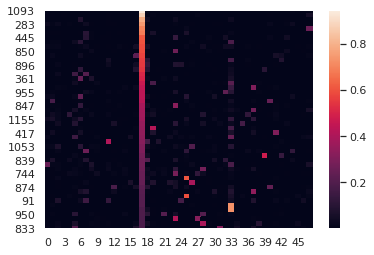

In [201]:
sns.set()
sns.heatmap(sorted_normed_mixtures.head(50))

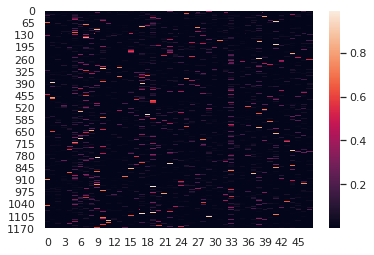

In [202]:
sns.heatmap(normed_mixtures)

## Compute correlation

In [203]:
corr = normed_mixtures.apply(lambda mixture: mixture.corr(duration, method='pearson'))

In [293]:
corr_sorted = corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

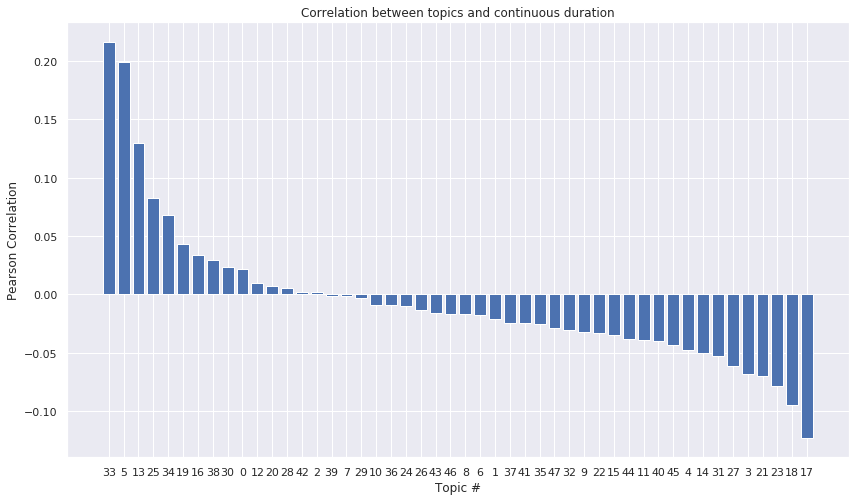

In [205]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(corr)), height=corr_sorted)
plt.title('Correlation between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(corr)), corr_sorted.index)
plt.ylabel('Pearson Correlation')

### Compute correlation with death

In [279]:
d2_df = pd.read_csv('/home/mcb/li_lab/pnair6/mimic/data/d2_phy_nurse_resp_6Nov19.csv')

In [281]:
death_7_df = d2_df[d2_df['DEATH'] == 1]['HADM_ID'].drop_duplicates()

In [282]:
death_7_df.shape

(191,)

In [283]:
train_df = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_d2_phy_nurse_48/train_notes.csv', header=None)

In [285]:
train_df.columns = ['HADM_ID', 'CATEGORY', 'TEXT', 'PROCTEXT', 'STARTTIME', 'ENDTIME', 'DURATION']
train_df.head()

,HADM_ID,CATEGORY,TEXT,PROCTEXT,STARTTIME,ENDTIME,DURATION
0,111846.0,Nursing,this year old male patient was admitted to osh...,year old male patient admitted osh ed septic s...,2115-06-29 10:30:00,2115-07-01 08:45:00,46.250000
1,171753.0,Nursing,f with no pmhx sp mva accident and tib fib fx ...,f pmhx sp mva accident tib fib fx transferred ...,2191-05-31 21:00:00,2191-06-07 08:43:00,155.716667
2,191708.0,Nursing,yr old with dm called ems today complaining of...,yr old dm called ems today complaining diaphor...,2201-02-06 01:09:00,2201-02-06 23:00:00,21.850000
3,116624.0,Nursing,pt admitted to hospital after being found down...,pt admitted hospital found husband mentally ch...,2114-07-21 16:19:00,2114-08-03 04:00:00,299.683333
4,172462.0,Nursing,yo female from where she had presentation with...,yo female presentation worsening hypoxemia pro...,2190-04-08 20:00:00,2190-04-18 10:00:00,230.000000


In [288]:
death = train_df['HADM_ID'].isin(death_7_df.tolist()).astype(int)

In [290]:
death.shape

(1233,)

In [291]:
death_corr = normed_mixtures.apply(lambda mixture: mixture.corr(death, method='pearson'))

In [294]:
death_corr_sorted = death_corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

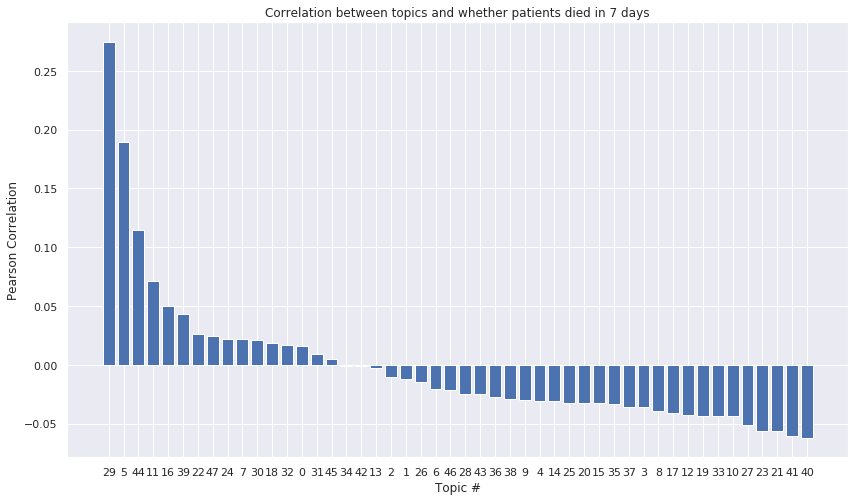

In [295]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(death_corr)), height=death_corr_sorted)
plt.title('Correlation between topics and whether patients died in 7 days')
plt.xlabel('Topic #')
plt.xticks(range(len(death_corr)), death_corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [206]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [207]:
top_pos = find_max_n(list(corr), 3)
top_neg = find_max_n(list(-corr), 3)

In [208]:
top_neg

[17, 18, 23]

In [209]:
top_topics = top_pos + top_neg
top_topics

[33, 5, 13, 17, 18, 23]

## Extract top words in those top topics

In [210]:
phis_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_all_notes_train_mixehr/data_JCVB0_nmar_K50_iter610_phi_normalized.csv', header=None)

In [211]:
phis_df.columns = ['CATEGORY', 'WORD_ID'] + [str(idx) for idx in range(50)]

In [212]:
phis_df.head()

,CATEGORY,WORD_ID,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,0,0.000445,2.752510e-04,0.000027,0.000004,6.078070e-04,0.000004,0.000096,7.552510e-06,...,0.000008,4.144130e-06,0.000012,0.000004,0.000011,1.870730e-04,0.000137,1.560180e-04,0.000007,0.000081
1,1,1,0.000304,5.427160e-04,0.000377,0.000002,2.084120e-06,0.000002,0.000019,1.084400e-06,...,0.000003,1.035460e-06,0.000003,0.000002,0.000002,1.299710e-06,0.000002,2.449880e-06,0.000003,0.000002
2,1,2,0.000001,6.691100e-07,0.000001,0.000001,9.148750e-07,0.000001,0.000001,7.926560e-07,...,0.000059,6.712320e-07,0.000001,0.000001,0.000092,9.802320e-07,0.000001,9.054080e-07,0.000001,0.000152
3,1,3,0.000007,1.160550e-04,0.000002,0.000002,4.132020e-05,0.000002,0.000003,1.086890e-06,...,0.000003,2.245100e-05,0.000002,0.000033,0.000002,1.411270e-06,0.000001,5.515300e-05,0.000002,0.000015
4,1,4,0.000002,1.865250e-06,0.000190,0.000003,2.928990e-06,0.000057,0.000172,1.782350e-06,...,0.000009,1.392170e-05,0.000005,0.000058,0.000004,4.093330e-06,0.000002,6.407950e-06,0.000336,0.000004


In [213]:
cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in top_topics]

In [214]:
top_phis_df = phis_df[cols]

In [215]:
top_phis_df.shape

(22061, 8)

In [216]:
top_phis_df.head()

,CATEGORY,WORD_ID,33,5,13,17,18,23
0,1,0,0.000006,0.000004,0.000012,0.000004,4.380240e-04,0.000256
1,1,1,0.000002,0.000002,0.000160,0.000002,2.164800e-06,0.000002
2,1,2,0.000002,0.000001,0.000045,0.000001,9.215920e-07,0.000001
3,1,3,0.000003,0.000002,0.000002,0.000002,1.348780e-06,0.000124
4,1,4,0.000004,0.000057,0.000006,0.000331,3.007240e-06,0.000668


In [217]:
vocab_df_1 = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_all_notes_train_mixehr/1_vocab.txt', header=None)
vocab_df_2 = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/multi_datatypes_15_thre_all_notes_train_mixehr/2_vocab.txt', header=None)

In [218]:
vocab_df_1.columns = ['WORD', 'WORD_ID']
vocab_df_2.columns = ['WORD', 'WORD_ID']

In [219]:
vocab_df_1.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aado,2
3,aao,3
4,aaox,4


In [220]:
vocab_dfs = {1: vocab_df_1, 2: vocab_df_2}

In [221]:
top_words_bytopic = [top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in top_topics]
top_words = []
for sublist in top_words_bytopic:
    for word in sublist:
        top_words.append(word)
top_types_bytopic = [top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in top_topics]
top_types = []
for sublist in top_types_bytopic:
    for cat in sublist:
        top_types.append(cat)

In [222]:
top_phis_df[(top_phis_df['CATEGORY'] == top_types[-1]) & (top_phis_df['WORD_ID'] == top_words[-1])]

,CATEGORY,WORD_ID,33,5,13,17,18,23
17705,2,5795,0.000554,0.000012,0.001586,0.000483,0.000144,0.008376


In [223]:
word_topic_matrix = pd.DataFrame(columns=top_phis_df.keys())
for idx in range(len(top_types)):
    cat = top_types[idx]
    word_id = top_words[idx]
    word_topic_matrix = pd.concat([word_topic_matrix, top_phis_df[(top_phis_df['CATEGORY'] == cat) & (top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [224]:
word_topic_matrix.shape

(60, 8)

In [225]:
word_topic_matrix.head()

,CATEGORY,WORD_ID,33,5,13,17,18,23
0,2,6444,0.047619,6.100600e-04,0.000002,9.284320e-07,0.000001,9.271290e-07
1,2,2817,0.037752,2.119930e-06,0.001523,3.260970e-06,0.001124,3.691560e-06
2,1,7756,0.027744,3.003530e-03,0.000029,4.300490e-06,0.001139,5.029930e-06
3,2,2632,0.020240,3.087690e-06,0.000547,1.760320e-02,0.000009,6.470330e-03
4,2,8836,0.016233,9.562540e-07,0.000002,1.024490e-06,0.000001,1.136410e-06


In [226]:
# categories and type ids
id_to_category = {
    1: 'physician',
    2: 'nursing',
    3: 'respiratory',
}

In [227]:
yticklabels = []
for idx, word_id in enumerate(top_words):
    vocab_df = vocab_dfs[top_types[idx]]
    yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
# xticklabels = ['23(pos)', '8(pos)', '36(pos)', '42(neg)', '17(neg)', '16(neg)']
xticklabels = [str(topic) + '(pos)' for topic in top_topics[0:3]] + [str(topic) + '(neg)' for topic in top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with continuous duration')

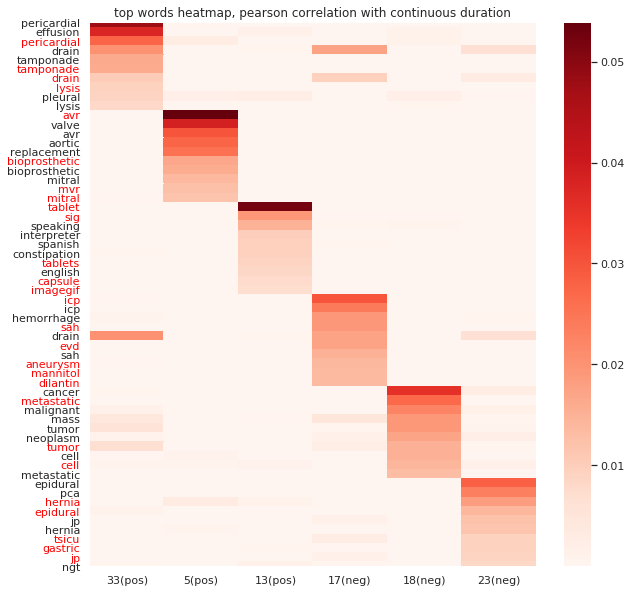

In [228]:
plt.figure(figsize=(10,10))
sns.heatmap(word_topic_matrix.iloc[:, 2:], yticklabels=yticklabels, xticklabels=xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
plt.title('top words heatmap, pearson correlation with continuous duration')

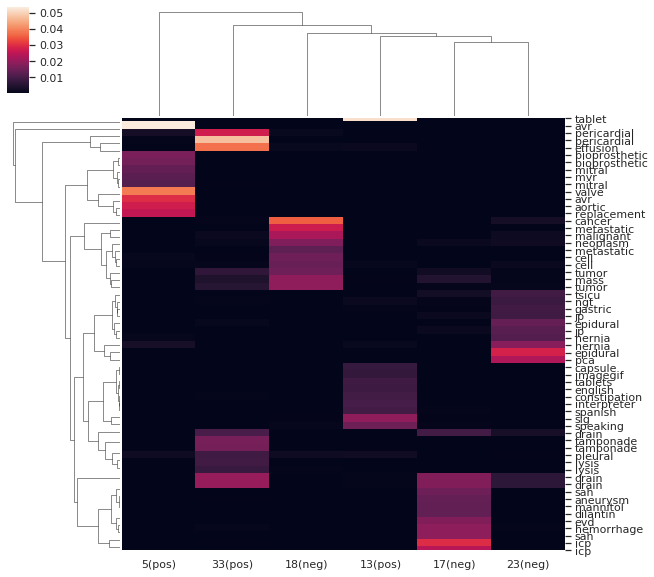

In [229]:
sns.set()
sns.clustermap(word_topic_matrix.iloc[:, 2:], yticklabels=yticklabels, xticklabels=xticklabels)

### Output entire heatmap

In [43]:
entire_top_words_bytopic = [phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:25] for topic in range(50)]
entire_top_words = []
for sublist in entire_top_words_bytopic:
    for word in sublist:
        entire_top_words.append(word)

In [44]:
entire_word_topic_matrix = phis_df.iloc[[word_id for word_id in entire_top_words]]

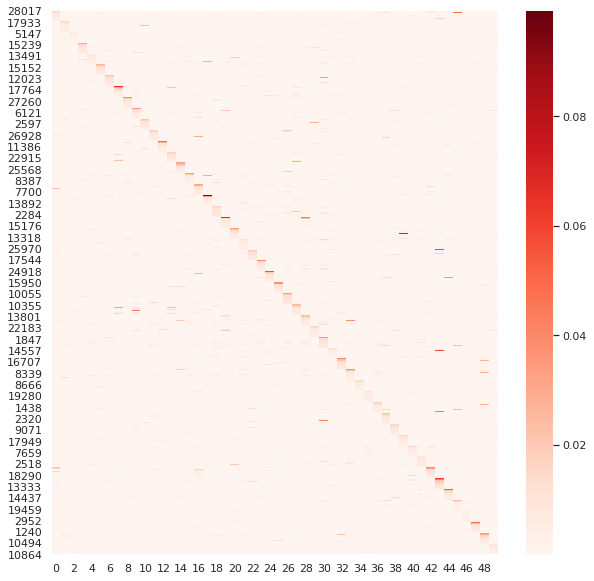

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(entire_word_topic_matrix.iloc[:, 2:], cmap='Reds')

## Binary duration
Threshold at 7 day

In [230]:
binary_duration = (duration > 7 * 24).astype(int)

In [231]:
bi_corr = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method='pearson'))

In [232]:
bi_corr_sorted = bi_corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

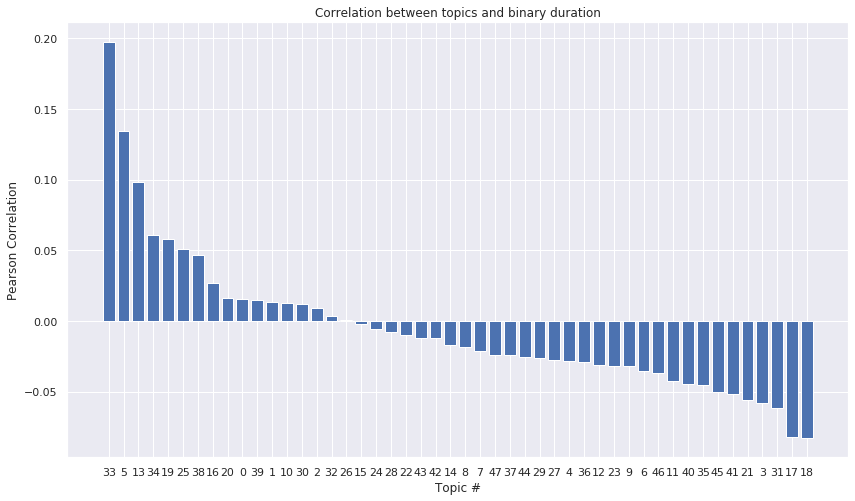

In [233]:
plt.figure(figsize=(14,8))
plt.bar(x=range(len(bi_corr)), height=bi_corr_sorted)
plt.title('Correlation between topics and binary duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_corr)), bi_corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [234]:
bi_top_topics = find_max_n(list(np.abs(bi_corr)), 6)

In [235]:
bi_top_pos = find_max_n(list(bi_corr), 3)
bi_top_neg = find_max_n(list(-bi_corr), 3)

In [236]:
bi_top_topics = bi_top_pos + bi_top_neg
bi_top_topics

[33, 5, 13, 18, 17, 31]

## Extract top words in those top topics

In [237]:
bi_cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in bi_top_topics]

In [238]:
bi_top_phis_df = phis_df[bi_cols]

In [239]:
bi_top_phis_df.head()

,CATEGORY,WORD_ID,33,5,13,18,17,31
0,1,0,0.000006,0.000004,0.000012,4.380240e-04,0.000004,0.000006
1,1,1,0.000002,0.000002,0.000160,2.164800e-06,0.000002,0.000005
2,1,2,0.000002,0.000001,0.000045,9.215920e-07,0.000001,0.000002
3,1,3,0.000003,0.000002,0.000002,1.348780e-06,0.000002,0.000060
4,1,4,0.000004,0.000057,0.000006,3.007240e-06,0.000331,0.000022


In [240]:
bi_top_words_bytopic = [bi_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_top_topics]
bi_top_words = []
for sublist in bi_top_words_bytopic:
    for word in sublist:
        bi_top_words.append(word)
bi_top_types_bytopic = [bi_top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in bi_top_topics]
bi_top_types = []
for sublist in bi_top_types_bytopic:
    for cat in sublist:
        bi_top_types.append(cat)

In [241]:
bi_word_topic_matrix = pd.DataFrame(columns=bi_top_phis_df.keys())
for idx in range(len(bi_top_types)):
    cat = bi_top_types[idx]
    word_id = bi_top_words[idx]
    bi_word_topic_matrix = pd.concat([bi_word_topic_matrix, bi_top_phis_df[(bi_top_phis_df['CATEGORY'] == cat) & \
                                                                           (bi_top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [242]:
bi_word_topic_matrix.head()

,CATEGORY,WORD_ID,33,5,13,18,17,31
0,2,6444,0.047619,6.100600e-04,0.000002,0.000001,9.284320e-07,0.000001
1,2,2817,0.037752,2.119930e-06,0.001523,0.001124,3.260970e-06,0.000005
2,1,7756,0.027744,3.003530e-03,0.000029,0.001139,4.300490e-06,0.000005
3,2,2632,0.020240,3.087690e-06,0.000547,0.000009,1.760320e-02,0.000006
4,2,8836,0.016233,9.562540e-07,0.000002,0.000001,1.024490e-06,0.000001


In [243]:
bi_yticklabels = []
for idx, word_id in enumerate(bi_top_words):
    vocab_df = vocab_dfs[bi_top_types[idx]]
    bi_yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
bi_xticklabels = [str(topic) + '(pos)' for topic in bi_top_topics[0:3]] + [str(topic) + '(neg)' for topic in bi_top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with binarized duration')

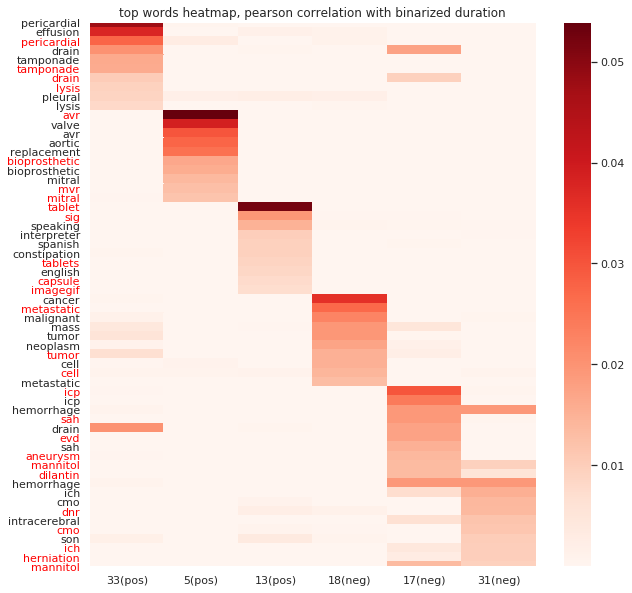

In [244]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_word_topic_matrix.iloc[:, 2:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if bi_top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
plt.title('top words heatmap, pearson correlation with binarized duration')

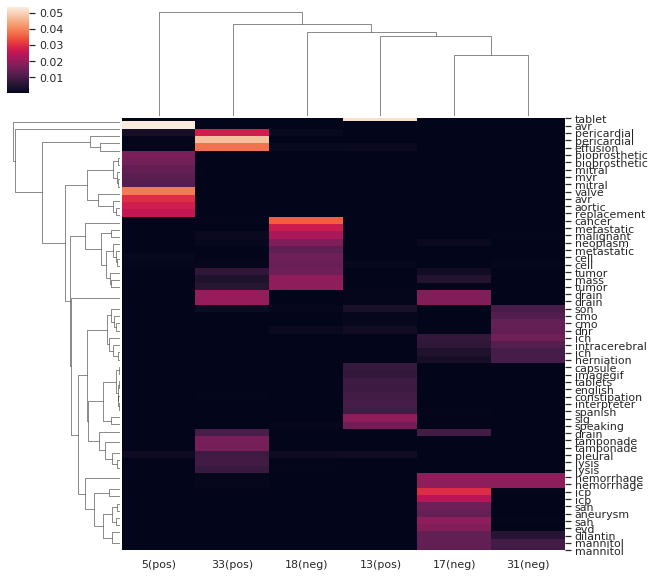

In [245]:
sns.set()
sns.clustermap(bi_word_topic_matrix.iloc[:, 2:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels)

## Try using cosine similarity instead of Pearson correlation
Because the correlation might not be linear

In [246]:
def cosine(series_1, series_2):
    return np.dot(series_1, series_2) / (np.linalg.norm(series_1, ord=2) * np.linalg.norm(series_2, ord=2))

In [247]:
cos = normed_mixtures.corrwith(duration, method=cosine)

In [248]:
cos.shape

(48,)

In [249]:
duration.shape

(1233,)

In [250]:
cos_sorted = cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

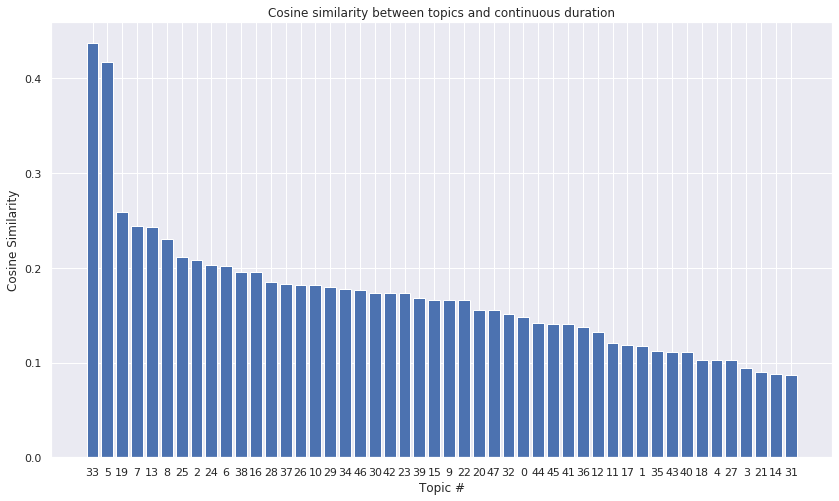

In [251]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(cos_sorted)), height=cos_sorted)
plt.title('Cosine similarity between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(cos_sorted)), cos_sorted.index)
plt.ylabel('Cosine Similarity')

### Death

In [296]:
cos_death_corr = normed_mixtures.corrwith(death, method=cosine)

In [297]:
cos_death_corr_sorted = cos_death_corr.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

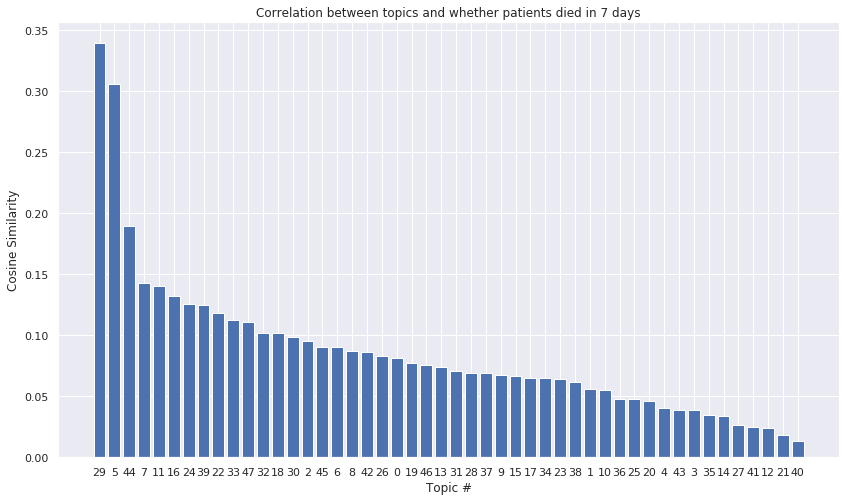

In [298]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(cos_death_corr)), height=cos_death_corr_sorted)
plt.title('Correlation between topics and whether patients died in 7 days')
plt.xlabel('Topic #')
plt.xticks(range(len(cos_death_corr)), cos_death_corr_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [252]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [253]:
cos_top_topics = find_max_n(list(cos), 6)

## Extract top words in those top topics

In [254]:
cos_cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in cos_top_topics]

In [255]:
cos_top_phis_df = phis_df[cos_cols]

In [256]:
cos_top_phis_df.head()

,CATEGORY,WORD_ID,33,5,19,7,13,8
0,1,0,0.000006,0.000004,0.000028,7.552510e-06,0.000012,0.000387
1,1,1,0.000002,0.000002,0.000002,1.084400e-06,0.000160,0.000002
2,1,2,0.000002,0.000001,0.000110,7.926560e-07,0.000045,0.000015
3,1,3,0.000003,0.000002,0.000001,1.086890e-06,0.000002,0.000062
4,1,4,0.000004,0.000057,0.000125,1.782350e-06,0.000006,0.000016


In [257]:
cos_top_words_bytopic = [cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in cos_top_topics]
cos_top_words = []
for sublist in cos_top_words_bytopic:
    for word in sublist:
        cos_top_words.append(word)
cos_top_types_bytopic = [cos_top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in cos_top_topics]
cos_top_types = []
for sublist in cos_top_types_bytopic:
    for cat in sublist:
        cos_top_types.append(cat)

In [258]:
cos_word_topic_matrix = pd.DataFrame(columns=cos_top_phis_df.keys())
for idx in range(len(cos_top_types)):
    cat = cos_top_types[idx]
    word_id = cos_top_words[idx]
    cos_word_topic_matrix = pd.concat([cos_word_topic_matrix, cos_top_phis_df[(cos_top_phis_df['CATEGORY'] == cat) & \
                                                                           (cos_top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [259]:
cos_word_topic_matrix.head()

,CATEGORY,WORD_ID,33,5,19,7,13,8
0,2,6444,0.047619,6.100600e-04,6.932310e-07,8.353150e-07,0.000002,0.000001
1,2,2817,0.037752,2.119930e-06,3.909530e-05,9.173310e-06,0.001523,0.000197
2,1,7756,0.027744,3.003530e-03,3.258330e-06,1.193890e-05,0.000029,0.000012
3,2,2632,0.020240,3.087690e-06,2.758360e-06,6.059390e-06,0.000547,0.000005
4,2,8836,0.016233,9.562540e-07,7.506020e-07,7.955440e-07,0.000002,0.000001


In [260]:
cos_yticklabels = []
for idx, word_id in enumerate(cos_top_words):
    vocab_df = vocab_dfs[cos_top_types[idx]]
    cos_yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
cos_xticklabels = [str(topic) for topic in cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with continuous duration')

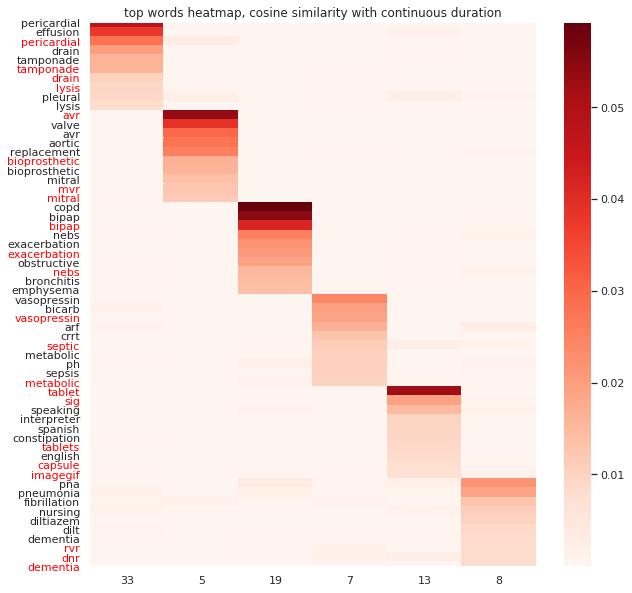

In [261]:
plt.figure(figsize=(10,10))
sns.heatmap(cos_word_topic_matrix.iloc[:, 2:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if cos_top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
plt.title('top words heatmap, cosine similarity with continuous duration')

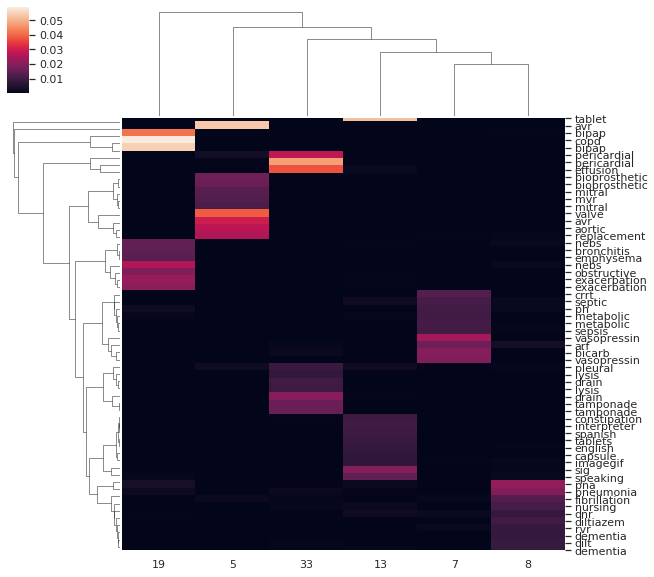

In [262]:
sns.set()
sns.clustermap(cos_word_topic_matrix.iloc[:, 2:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels)

### Try binarized

In [263]:
bi_cos = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method=cosine))

In [264]:
bi_cos_sorted = bi_cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

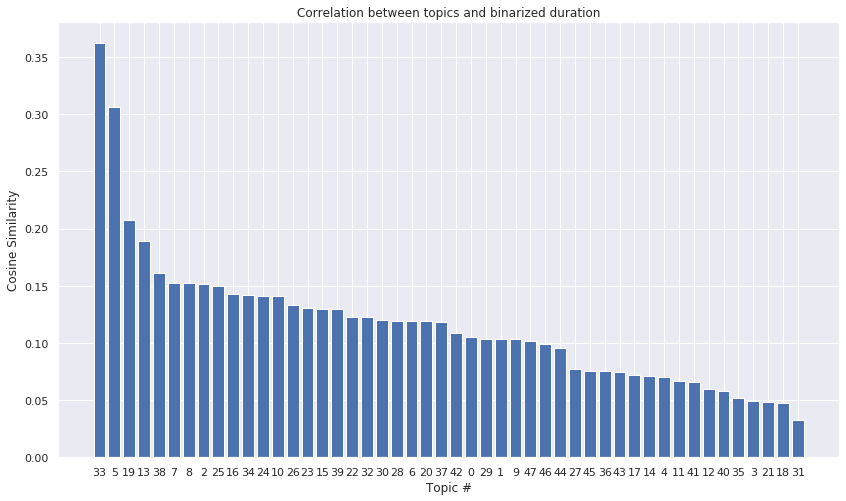

In [265]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(bi_cos_sorted)), height=bi_cos_sorted)
plt.title('Correlation between topics and binarized duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_cos_sorted)), bi_cos_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [266]:
bi_cos_top_topics = find_max_n(list(bi_cos), 6)

## Extract top words in those top topics

In [267]:
bi_cos_cols = ['CATEGORY', 'WORD_ID'] + [str(value) for value in bi_cos_top_topics]

In [268]:
bi_cos_top_phis_df = phis_df[bi_cos_cols]

In [269]:
bi_cos_top_phis_df.head()

,CATEGORY,WORD_ID,33,5,19,13,38,7
0,1,0,0.000006,0.000004,0.000028,0.000012,0.000167,7.552510e-06
1,1,1,0.000002,0.000002,0.000002,0.000160,0.000003,1.084400e-06
2,1,2,0.000002,0.000001,0.000110,0.000045,0.000001,7.926560e-07
3,1,3,0.000003,0.000002,0.000001,0.000002,0.000002,1.086890e-06
4,1,4,0.000004,0.000057,0.000125,0.000006,0.000003,1.782350e-06


In [270]:
bi_cos_top_words_bytopic = [bi_cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_cos_top_topics]
bi_cos_top_words = []
for sublist in bi_cos_top_words_bytopic:
    for word in sublist:
        bi_cos_top_words.append(word)
bi_cos_top_types_bytopic = [bi_cos_top_phis_df.sort_values(by=str(topic), ascending=False)['CATEGORY'][0:10] for topic in bi_cos_top_topics]
bi_cos_top_types = []
for sublist in bi_cos_top_types_bytopic:
    for cat in sublist:
        bi_cos_top_types.append(cat)

In [271]:
bi_cos_word_topic_matrix = pd.DataFrame(columns=bi_cos_top_phis_df.keys())
for idx in range(len(bi_cos_top_types)):
    cat = bi_cos_top_types[idx]
    word_id = bi_cos_top_words[idx]
    bi_cos_word_topic_matrix = pd.concat([bi_cos_word_topic_matrix, bi_cos_top_phis_df[(bi_cos_top_phis_df['CATEGORY'] == cat) & \
                                                                           (bi_cos_top_phis_df['WORD_ID'] == word_id)]], ignore_index=True)

In [272]:
bi_cos_word_topic_matrix.head()

,CATEGORY,WORD_ID,33,5,19,13,38,7
0,2,6444,0.047619,6.100600e-04,6.932310e-07,0.000002,0.000002,8.353150e-07
1,2,2817,0.037752,2.119930e-06,3.909530e-05,0.001523,0.000381,9.173310e-06
2,1,7756,0.027744,3.003530e-03,3.258330e-06,0.000029,0.000574,1.193890e-05
3,2,2632,0.020240,3.087690e-06,2.758360e-06,0.000547,0.000371,6.059390e-06
4,2,8836,0.016233,9.562540e-07,7.506020e-07,0.000002,0.000002,7.955440e-07


In [273]:
bi_cos_yticklabels = []
for idx, word_id in enumerate(bi_cos_top_words):
    vocab_df = vocab_dfs[bi_cos_top_types[idx]]
    bi_cos_yticklabels.append(vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0])
bi_cos_xticklabels = [str(topic) for topic in bi_cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with binarized duration')

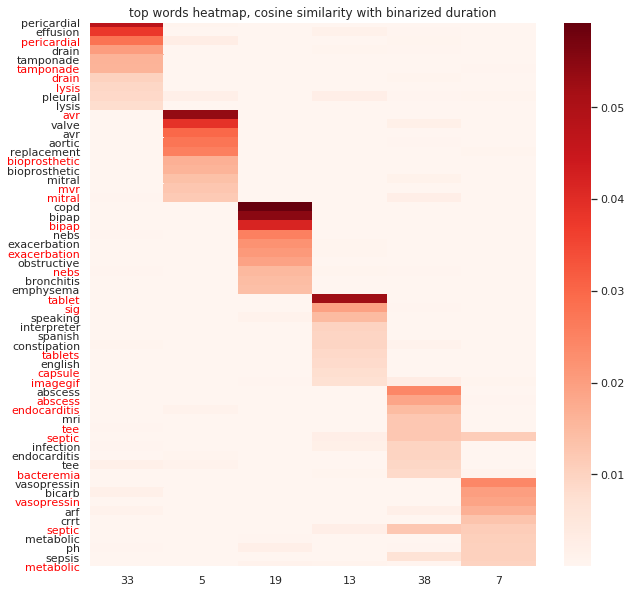

In [274]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_cos_word_topic_matrix.iloc[:, 2:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels, cmap='Reds')
ax = plt.gca()
for idx in range(len(ax.get_yticklabels())):
    if bi_cos_top_types[idx] == 1:
        ax.get_yticklabels()[idx].set_color("red")
plt.title('top words heatmap, cosine similarity with binarized duration')

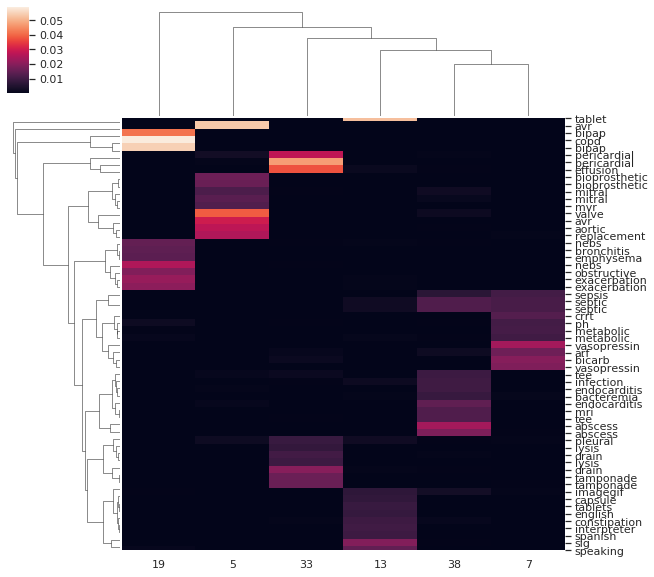

In [275]:
sns.set()
sns.clustermap(bi_cos_word_topic_matrix.iloc[:, 2:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels)